In [3]:
# import tensorflow and keras library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile,os

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-08 06:19:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.93MB/s    in 87s     

2021-07-08 06:21:07 (3.53 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [8]:
# extract the dataset zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [9]:
# checking rockpaperscrissord directory
os.listdir('/tmp/rockpaperscissors/')

['rps-cv-images', 'scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [10]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4 # splitting 40% of dataset for validation data 
)

In [87]:
# preparing the data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'sparse',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'sparse',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [88]:
# CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [92]:
# compile the model with loss function 'SparseCategoricalCrossentropy' and optimizer 'adam'
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [93]:
# making callback for stop the iteration if it meet the requirement which is accuracy=98%
accuracy_threshold = 0.98

class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nThe model Accuracy reached %2.2f%%' %(logs['accuracy']*100), 'so the training stopped.')
            self.model.stop_training = True

In [94]:
# train data with model.fit
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [myCallbacks()])

Epoch 1/20
25/25 - 30s - loss: 0.0697 - accuracy: 0.9766 - val_loss: 0.0358 - val_accuracy: 0.9937
Epoch 2/20
25/25 - 30s - loss: 0.0636 - accuracy: 0.9837 - val_loss: 0.0566 - val_accuracy: 0.9812

The model Accuracy reached 98.37% so the training stopped.


Saving WhatsApp Image 2021-07-08 at 2.24.06 PM.jpeg to WhatsApp Image 2021-07-08 at 2.24.06 PM (2).jpeg
WhatsApp Image 2021-07-08 at 2.24.06 PM.jpeg
the image identified as paper


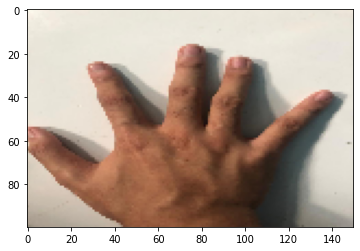

In [105]:
# predicting images that are uploaded by users
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  
  print(fn)
  if classes[0, 0] == 1:
    print('the image identified as paper')
  elif classes[0, 1] == 1:
    print('the image identified as rock')
  elif classes[0, 2] == 1:
    print('the image identified as scissors')
  else:
    print('unknown')